In [2]:
# SOFI CAPM Analsis with linear regression, and closing price prediction with simple machine learning model
# Author: Eddy Pandzic

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df2 = pd.read_csv("SOFI.csv")

In [3]:
# Prints out first 5 rows of data from the csv
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,10/4/2021,16.290001,16.680000,15.88,16.090000,16.090000,21849700
1,10/5/2021,16.145000,16.760000,16.08,16.250000,16.250000,13941200
2,10/6/2021,16.000000,16.639999,15.92,16.620001,16.620001,11896400
3,10/7/2021,16.937000,17.090000,16.34,16.400000,16.400000,15267800
4,10/8/2021,16.527000,16.650000,16.17,16.209999,16.209999,11054400


In [4]:
# Print summary statistics of SOFI stock
df2.describe()

,Open,High,Low,Close,Adj Close,Volume
count,503.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02
mean,8.692085,8.949427,8.406406,8.659811,8.659811,4.351155e+07
std,4.424985,4.544753,4.259969,4.381104,4.381104,2.820141e+07
min,4.300000,4.370000,4.240000,4.300000,4.300000,1.105440e+07
25%,5.730000,5.880000,5.575000,5.725000,5.725000,2.667565e+07
50%,7.070000,7.280000,6.835000,7.010000,7.010000,3.562220e+07
75%,9.525000,9.812500,9.235000,9.530000,9.530000,5.097920e+07
max,23.990000,24.650000,22.830000,23.290001,23.290001,2.689360e+08


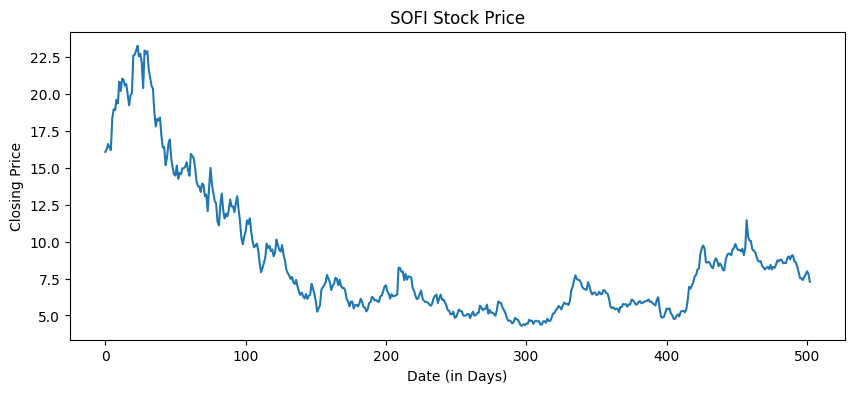

In [5]:
# Plotting a time series of closing price
plt.figure(figsize=(10,4))
plt.title("SOFI Stock Price")
plt.xlabel("Date (in Days)")
plt.ylabel("Closing Price")
plt.plot(df2["Close"])


               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.998212  0.998178  0.995767   0.995767 -0.005846
High       0.998212  1.000000  0.998279  0.998311   0.998311  0.013011
Low        0.998178  0.998279  1.000000  0.998309   0.998309 -0.025798
Close      0.995767  0.998311  0.998309  1.000000   1.000000 -0.007105
Adj Close  0.995767  0.998311  0.998309  1.000000   1.000000 -0.007105
Volume    -0.005846  0.013011 -0.025798 -0.007105  -0.007105  1.000000


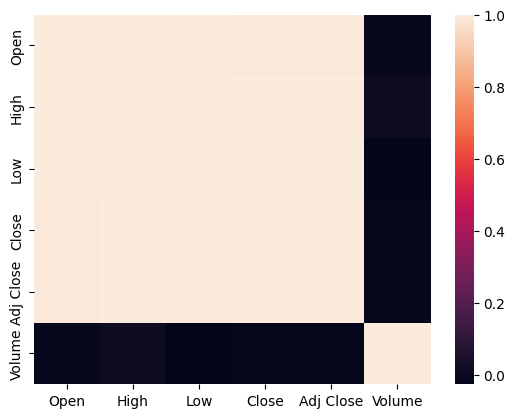

In [6]:
# Print out correlation chart, and correlation heatmap
print(df2.corr(numeric_only = True))
sns.heatmap(df2.corr(numeric_only = True))
plt.show()

In [7]:
# Applying data to basic machine learning model
x = df2[["Open", "High", "Low"]]
y = df2[["Close"]]
x = x.to_numpy()
y = y.to_numpy()
#Variable x will be the attributes for which the decision tree regression will find the SDR for
#Variable x will be the target variable, which will be taken as the average returned from an array of data sorted by the attributes
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
# Decision Tree Regression Algorithm
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
data = pd.DataFrame(data={"Predicted Closing Price": ypred})
print(data.head())

   Predicted Closing Price
0                     5.67
1                    12.00
2                     4.70
3                     7.14
4                    11.10


Text(0.5, 1.0, 'Stock Prediction for Social Finance (SOFI)')

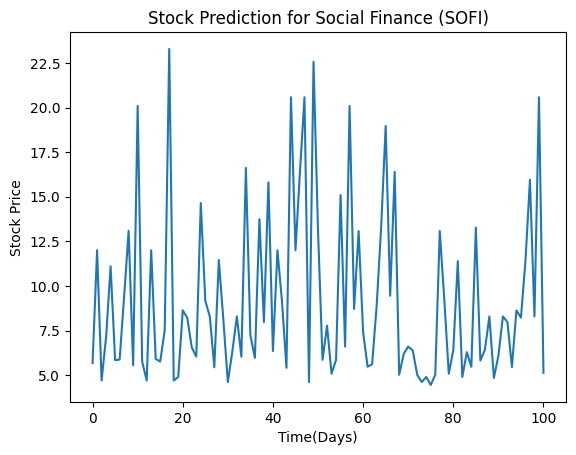

In [9]:
# Plotting Returns
plt.plot(data)
plt.xlabel("Time(Days)")
plt.ylabel("Stock Price")
plt.title("Stock Prediction for Social Finance (SOFI)")